In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Gathering Dataset

In [3]:
# Read the given CSV file, and view some sample records

df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Basic information about the dataset fields

In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## adding data definition for reference

```yaml
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
```

## EDA

here we are considering `cnt` as **target column**

In this, few columns has no use while model training as they are identification columns. 
1. __instant__

also, `workingday` is a dependent variable as it's definition states that __if day is neither weekend nor holiday is 1, otherwise is 0__. so we can drop that column as well. interestingly, we can consider these fields as a conbination of dummy fields from some hypothetocal day_type categorical field where workingday is the field that was removing to get (n-1) category dummy fields

In [7]:
# droping identification column
df = df.drop(columns=['instant', 'workingday'])

In [8]:
df['dteday'].value_counts()

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64

In [9]:
df['day'] = df['dteday'].apply(lambda x: int(x.split('-')[0]))

we have extracted day from `dteday` and other fields already represent month and year of the day, so now we can drop `dteday`

In [10]:
df = df.drop(columns = ['dteday'])

## Visializing Data
Lets visualize the coorelation between remaining columns w.r.t. `cnt` to see what fields are relevant for model training

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

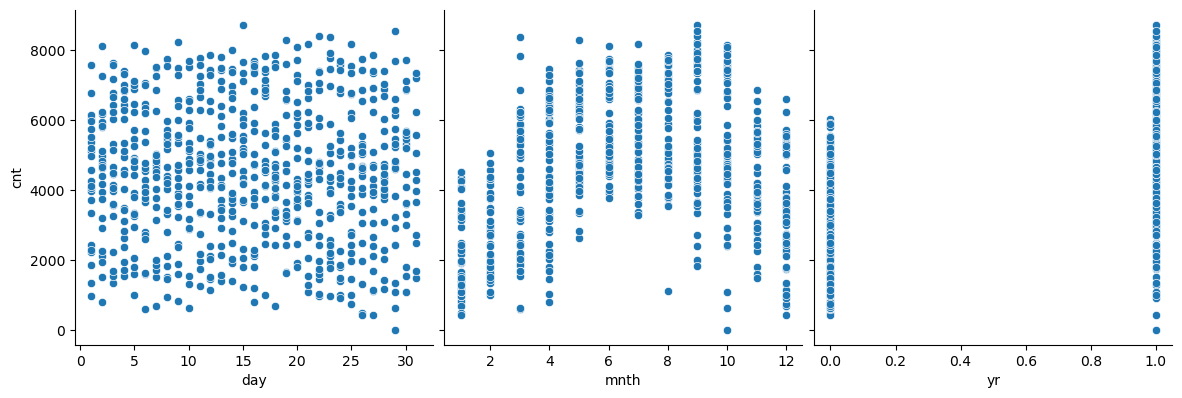

In [12]:
sns.pairplot(df, x_vars=['day', 'mnth', 'yr'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

> as we can see above, evidently `day` is very noisy field so we __can't use day__ for model training/testing. but `mnth` and `yr` can be used as they are showing some visual relation with target field

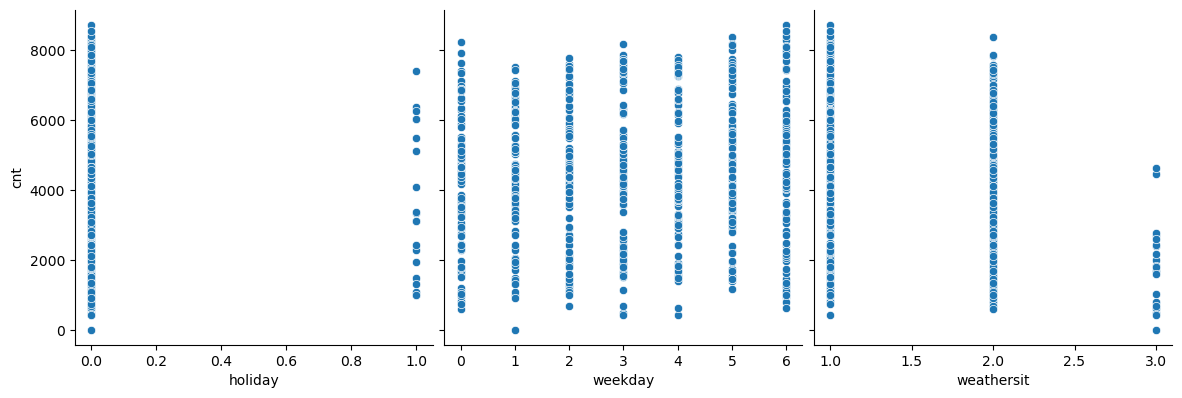

In [13]:
sns.pairplot(df, x_vars=['holiday', 'weekday', 'weathersit'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

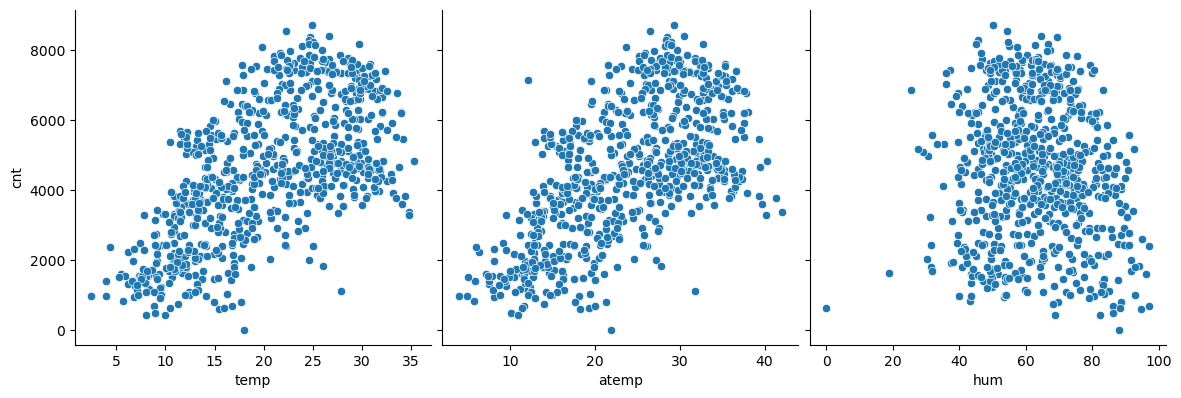

In [14]:
sns.pairplot(df, x_vars=['temp', 'atemp', 'hum'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

> as we can see above, `hum` field is very noisy and __will not actively participate in identifying target field__. but `temp` & `atemp` have a __very edivent relation to the target field__.

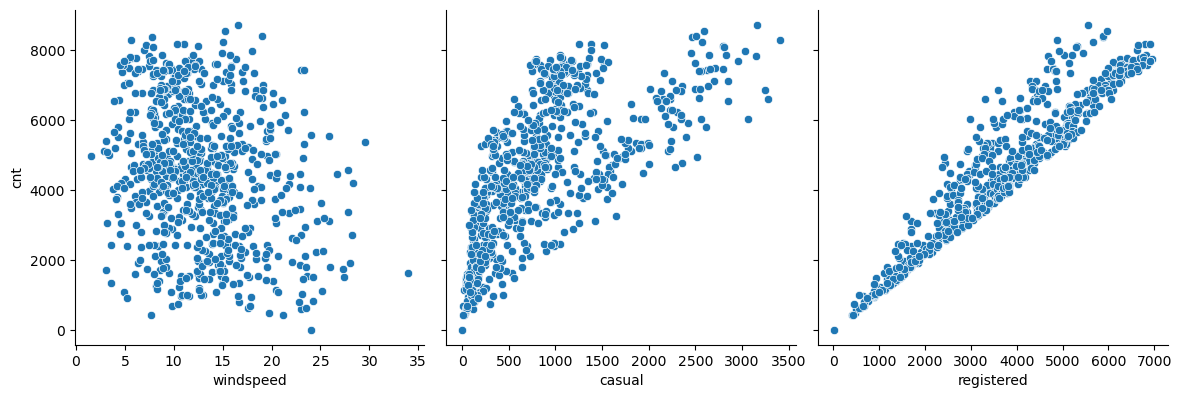

In [15]:
sns.pairplot(df, x_vars=['windspeed', 'casual', 'registered'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

> as we can see above, `windspeed` field is very noise and have no relation to target field, we __should not use windspeed field for model training__

> `casual` and `registered` have very sharp realtion with our target field, we should __definetely use these columns for model training__.

## all fields correlation matrix
for better visualizing the relationship between all the fields available in our dataset

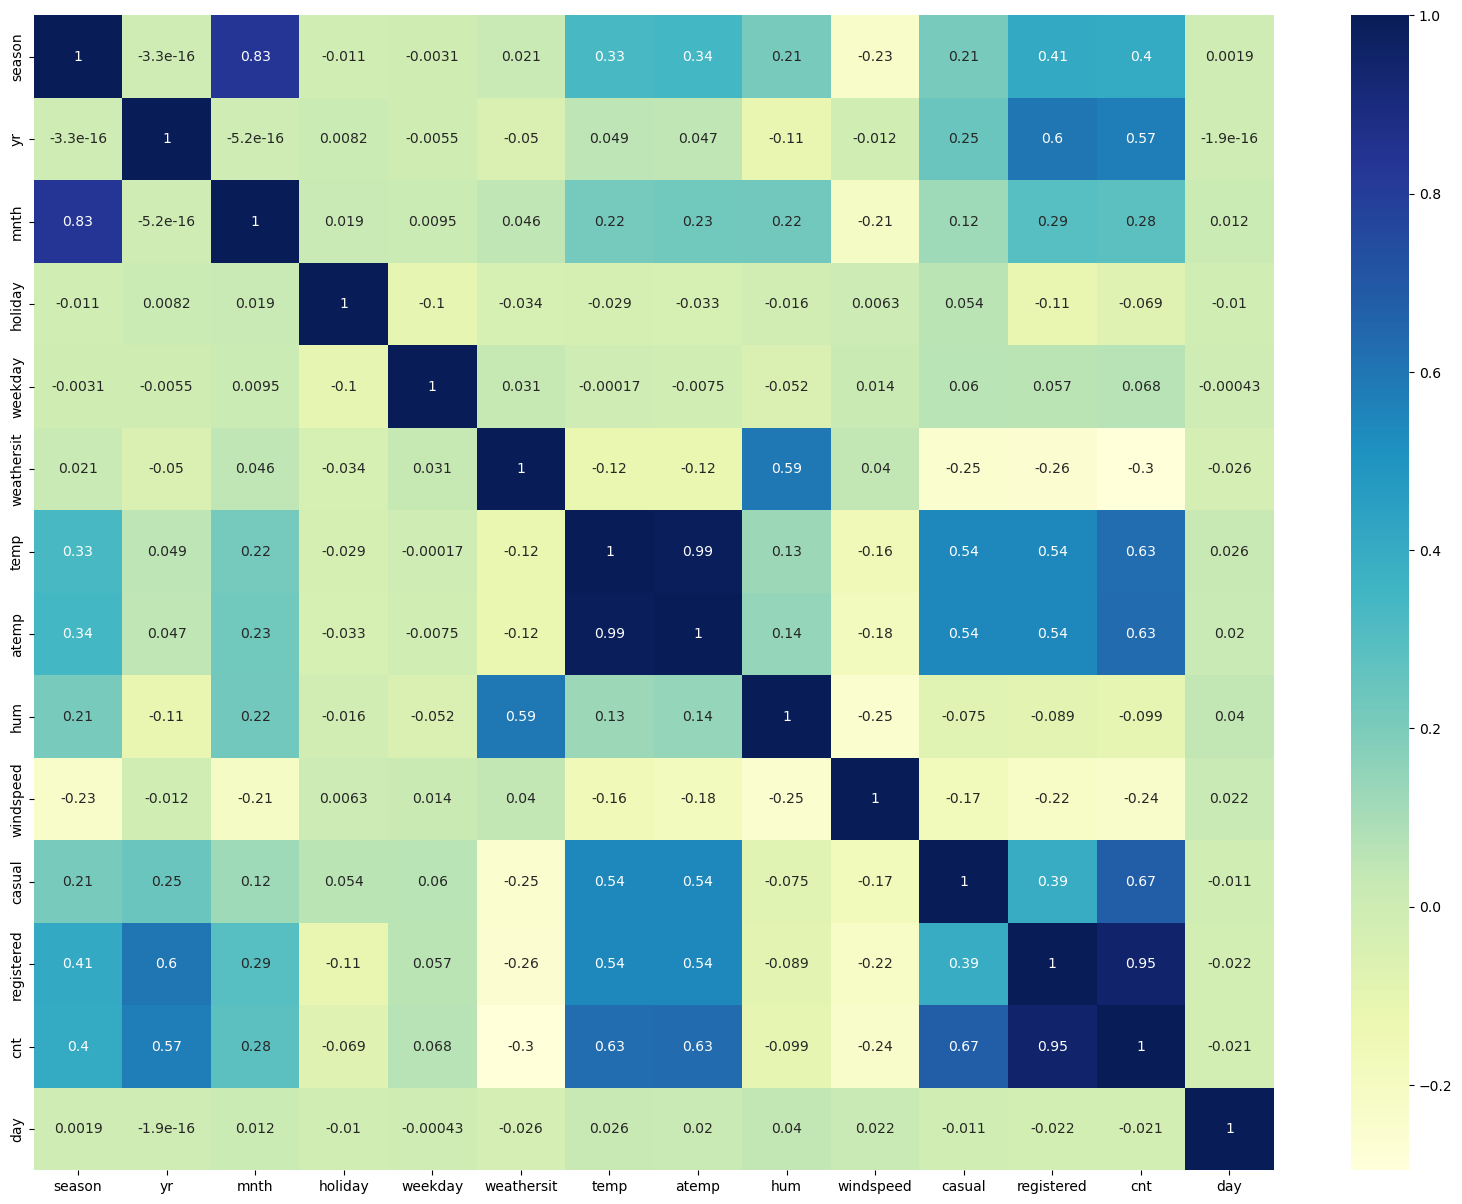

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

> here we can observe the correlation matrix of all remaining fields. we can see that __temp & atemp have 99% correlation__ so using both the columns for training shouldn't be required as they appear to be corelated fields

# final list of field to be used for model training/test
After all the visual and data EDA Analysis that we did before, we can safely decide the final list of fields to be used for further model traning and testing phase

fields:
1. __registered__
1. __casual__
1. __atemp__
1. __yr__
1. __season__
1. __mnth__
1. __holiday__
1. __weekday__
1. __weathersit__

arraged by their correlation percentage with `cnt` (target field)


### Handling Categorical fields

we have few categorical fields in the dataset. 
1. __yr__
1. __season__
1. __holiday__
1. __weathersit__

here __yr__ and __holiday__ are 2 only 2 categories respectively (by definition) so we __can let them be as is__.

while __season__ and __weathersit__ needs to be converted into __dummy fields as they have considerable amount of categories__.

In [17]:
dummy_df_season = pd.get_dummies(df['season'], drop_first=True, prefix='season')
dummy_df_weathersit = pd.get_dummies(df['weathersit'], drop_first=True, prefix='weathersit')
df = pd.concat([df, dummy_df_season, dummy_df_weathersit], axis=1)

# Model building (Multiple Linear Regression)

In [18]:
import statsmodels.api as sm

#### create X and y dataframes 

In [19]:
X = df[['registered', 'casual', 'atemp', 'yr', 'mnth', 'holiday', 'weekday', 'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3']]
y = df['cnt']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Building a linear model with statsmodel
also statsmodel by default only fits a linear regression line on the dataset with origin as the start, which means it doesn't have intercept by default. to add intercept to the dataset (train & test) you can use `add_constant` func of statsmodel which wil be used below

In [21]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [22]:
lr.params

const           1.541878e-12
registered      1.000000e+00
casual          1.000000e+00
atemp          -1.403322e-13
yr              1.023182e-12
mnth           -3.552714e-14
holiday        -2.557954e-12
weekday         1.278977e-13
season_2        4.405365e-13
season_3       -9.094947e-13
season_4        3.126388e-13
weathersit_2    6.821210e-13
weathersit_3    1.623590e-12
dtype: float64

In [23]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.144e+31
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:59:41   Log-Likelihood:                 12860.
No. Observations:                 510   AIC:                        -2.569e+04
Df Residuals:                     497   BIC:                        -2.564e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.542e-12   5.58e-13      2.764   

> from the above lr summary, we get that `mnth` & `season_4` have very high p-score in model summary. which means the have very low effect on dependent variable `cnt`. let;s remove these columns and see if that helps

## second try
trying new linear model training with some changes to the original training set, let's see if any improvement happens relative to the first model

In [24]:
X_train_sm_t2 = X_train_sm.drop(columns=['mnth', 'season_4'])
X_test_sm_t2 = X_test_sm.drop(columns=['mnth', 'season_4'])

In [25]:
# Fit the resgression line using 'OLS'
lr_t2 = sm.OLS(y_train, X_train_sm_t2).fit()

In [26]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr_t2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.329e+30
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:59:41   Log-Likelihood:                 12457.
No. Observations:                 510   AIC:                        -2.489e+04
Df Residuals:                     499   BIC:                        -2.485e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.331e-12   1.17e-12      6.283   

> as we can see above, the F-statistic of the `t2` Linear Regression Model is lesser than the initial model, which means the initial model was a bit better than the t2 model. let's continue our Ananlysis on initial model itself

# Residual Analysis of Model
Residual Analysis of a model help us in validating the assumptions and determining the reliability of inference that we made.

### Normal Distribution of error terms
we need to confirm that all the error terms are normaly distribution

In [27]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

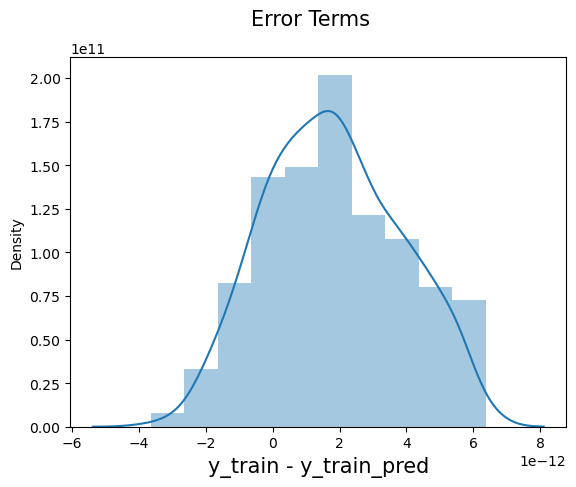

In [28]:
fig = plt.figure()
sns.distplot(res, bins = 10)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

> here we can positively confirm that __error terms are following a normal distribution curve__ as expected. 

### Model isn't fitting by any chance
we need to see the patter in scatter plot of error terms to make sure there is no inherent patterns in the plot

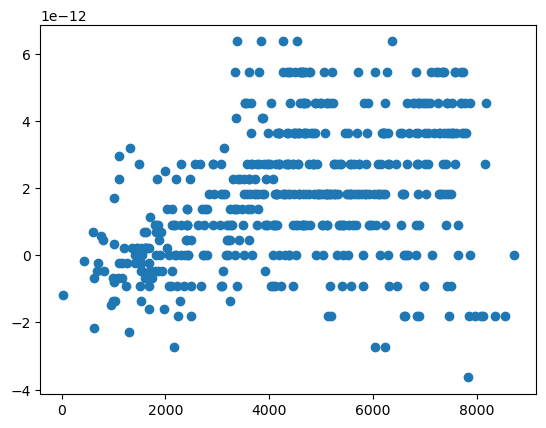

In [29]:
plt.scatter(y_train,res)
plt.show()

> here we can see there is no evident pattern between the y_train and error terms, which indicates that the model fit is not by chance. __this model qualifies as a good prodicting model__

# Predictions on Test Dataset
Now that we have a linear Regression Model line fitted correctly according to our findings, let's use this model to predict test dataset target values and evaluate `r-score`

In [30]:
y_pred = lr.predict(X_test_sm)
y_pred.head()

184    6043.0
535    6211.0
299    2659.0
221    4780.0
152    4968.0
dtype: float64

## RMSE
checking if the mean squared error is low

In [31]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

2.7850758995069306e-12

## Residual Squared Score

In [32]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
r_squared

1.0

> here the __r2-score is 100%__, which means our model __explains all the variation in the target variable around its mean__.

# Thank You